<h1><center>Einführung in die Neuroinformatik - Übungsblatt 3</center></h1>
<h2><center>Dominik Authaler, Marco Deuscher und Carolin Schindler</center></h2>
<h2><center>Gruppe Q</center></h2>
<h2><center>Mai 2019</center></h2>

### Aufgabe 1:
Von der Aufgabenstellung gegeben sind folgende Gleichungen:
$$
\begin{align}
    y(x) = f(w \cdot x+b)
\end{align}
$$
$$
\begin{align}
    E(w, b) = \frac{1}{2}\sum_{\mu=1}^{M}(T_{\mu} - y(x_{\mu}))^2 = \frac{1}{2}\sum_{\mu=1}^{M}(T_{\mu} - f(w \cdot x_{\mu}+b))^2
\end{align}
$$

1.)   
Berechnet werden soll der Gradient:
$$
\begin{align}
    \nabla E(w, b) = \begin{pmatrix}\frac{\partial E}{\partial w} \\ \frac{\partial E}{\partial b}\end{pmatrix} = \begin{pmatrix}\frac{1}{2} \cdot 2 \sum_{\mu=1}^{M}(T_{\mu} - f(w \cdot x_{\mu}+b)) \cdot (-f'(w \cdot x_{\mu}+b)) \cdot x_{\mu}\\ \frac{1}{2} \cdot 2 \sum_{\mu=1}^{M}(T_{\mu} - f(w \cdot x_{\mu}+b)) \cdot (-f'(w \cdot x_{\mu}+b)) \cdot 1\end{pmatrix} = \begin{pmatrix} - \sum_{\mu=1}^{M}(T_{\mu} - f(w \cdot x_{\mu}+b)) \cdot f'(w \cdot x_{\mu}+b) \cdot x_{\mu}\\ -\sum_{\mu=1}^{M}(T_{\mu} - f(w \cdot x_{\mu}+b)) \cdot f'(w \cdot x_{\mu}+b) \end{pmatrix}
    = \begin{pmatrix} \sum_{\mu=1}^{M}(f(w \cdot x_{\mu}+b) - T_{\mu}) \cdot f'(w \cdot x_{\mu}+b) \cdot x_{\mu}\\ \sum_{\mu=1}^{M}(f(w \cdot x_{\mu}+b) - T_{\mu}) \cdot f'(w \cdot x_{\mu}+b) \end{pmatrix}
\end{align}
$$

2.)  
Aus dem oben berechneten Gradienten sollen nun Lernregeln formuliert werden:  
a) Inkrementelle Version:
$$
\begin{align}
    w(t+1) = w(t) + \eta \cdot (T_{\mu} - f(w(t) \cdot x_{\mu} + b(t)) \cdot f'(w(t) \cdot x_{\mu} + b(t)) \cdot x_{\mu})\\
    b(t+1) = b(t) + \eta \cdot (T_{\mu} - f(w(t) \cdot x_{\mu} + b(t)) \cdot f'(w(t) \cdot x_{\mu} + b(t)))
\end{align}
$$

b) Batch Version:
$$
\begin{align}
    w(t+1) = w(t) + \eta \cdot \sum_{\mu=1}^{M}(T_{\mu} - f(w(t) \cdot x_{\mu} + b(t)) \cdot f'(w(t) \cdot x_{\mu} + b(t)) \cdot x_{\mu})\\
    b(t+1) = b(t) + \eta \cdot \sum_{\mu=1}^{M}(T_{\mu} - f(w(t) \cdot x_{\mu} + b(t)) \cdot f'(w(t) \cdot x_{\mu} + b(t)))
\end{align}
$$

3.)   
Nun soll die oben formulierte Batch Version am gegebenen Beispiel ausprobiert werden:
  
Dazu wird nun die Transferfunktion $f(x) = \frac{1}{1 + e^{-x}}$ zusammen mit ihrer Ableitung definiert und der Anschaulichkeit halber geplottet:

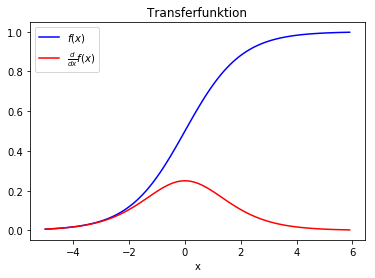

In [75]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(x):
    return (1 / (1 + math.exp(-x)))

def f_deriv(x): 
    return math.exp(-x) / ((1 + math.exp(-x)) ** 2)

x = np.arange(-5,6,.1)
y = []
y_d = []
for i in x: 
    y.append(f(i))
    y_d.append(f_deriv(i))

plt.title(r'Transferfunktion')
plt.xlabel('x')
plt.plot(x, y, 'b')
plt.plot(x, y_d, 'r')
plt.gca().legend(('$f(x)$',r'$\frac{d}{dx}f(x)$'))
plt.show()

Außerdem muss noch das Lehrersignal T definiert werden:

In [76]:
def T(x):
    if x < -1 or x > 2:
        print(r'Signal is only provided for {-1, 0, 1, 2}')
        return 0
    else: 
        if x == 0:
            return 1
        else: 
            return 0

a) Nun soll der Gradient der Fehlerfunktion für die Anfangswerte $w(0) =  -1$ und $b(0) = 3$ berechnet werden:

In [77]:
b0 = 3
w0 = -1

#Array mit den zulässigen Werten für $\mu$
mu = np.arange(-1, 3)

grad_w0 = 0
grad_b0 = 0

for x in mu:
    grad_w0 += (f(w0 * x + b0) - T(x)) * f_deriv(w0 * x + b0) * x
    grad_b0 += (f(w0 * x + b0) - T(x)) * f_deriv(w0 * x + b0)
    
print('Grad_w0: ' + str(grad_w0))
print('Grad_b0: ' + str(grad_b0))


[-1  0  1  2]
Grad_w0: 0.36260270307341996
Grad_b0: 0.25141536222290073


Die hier zu sehende Grafik wurde mittels Mathematica erstellt und zeigt den berechneten Gradienten für die gegebenen Anfangswerte von $w$ und $b$:
<img src="ENI_B3_2b).png">

c) Als nächstes soll eine Iteration der oben formulierten Batch-Lernregel durchgeführt werden. Dabei ist die Lernrate mit $\eta = 0.8$ vorgegeben:

In [80]:
eta = 0.8

w1 = w0 - eta * grad_w0
b1 = b0 - eta * grad_b0

print('W1: ' + str(w1))
print('B1: ' + str(b1))

W1: -1.290082162458736
B1: 2.7988677102216792


d) Das hier vorliegende Problem ist, dass der Gradient immer nur auf das nächste lokale Maximum zeigt. Durch die Negation erhält man also auch nur das nächstgelegene lokale Minimum und hat keine Möglichkeit, rein am Gradienten abzulesen, ob es auch wirklich das globale Minimum ist. 

4.)   
a) Pfad 1 gehört zur Batch-Lernregel, was sehr gut daran auszumachen ist, dass im Vergleich zu Pfad 2 nur sehr wenige Anpassungen von w und b notwendig waren, bis das lokale Minimum erreicht wurde. Dagegen ist Pfad 2 sehr "zackig", was sich damit deckt, dass bei der inkrementellen Lernregel nach jedem Vergleich mit einem Lehrersignal die Werte verändert werden.
  
b) Ein großer Nachteil der Batch-Lernregel ist, dass eine Anpassung der Werte alle Lehrersignale benötigt. Daher ist der für die Anpassung benötigte Rechenaufwand sehr groß. Dagegen ist der Rechenaufwand bei der inkrementellen Lernregel deutlich kleiner, wobei diese den Nachteil mit sich bringt, dass die Änderungen sich teilweise wieder selbst aufheben. Daher ist meist die Abweichung zur idealen "Route" zum lokalen Minimum deutlich größer als bei der Batch-Lernregel.
Mini-Batches kombinieren nun die Vorteile beider Verfahren, indem die Berechnung aufgrund der kleineren Datenmenge einfacher wird, der Abstieg aber aufgrund der Verwendung einer Teilmenge und nicht nur einzelner Lehrersignale deutlich "stabiler" (weniger "zackig") erfolgt.

5.)  
Anhand der Animation und der oben gegebenen Formeln wird deutlich, dass die Lernrate vor allem die "Schrittweite", also die Größe der Änderung zwischen zwei Iterationen, beeinflusst. Für sehr kleine Lernraten / Schrittweiten werden viele Iterationen benötigt, bis das lokale Minimum erreicht ist. Dies gilt allerdings auch für sehr große Lernraten, da man dann oft über das lokale Minimum springt und diesem dadurch wieder nur sehr langsam näher kommt. Beide Extreme bringen also Nachteile mit sich. 

6.)  
Die Ursache der Abweichung liegt darin begründet, dass hier nur ein einzelnes Perzeptron verwendet wurde. Daher können nur linear separierbare Probleme ideal gelöst werden. Bei dem gewählten Beispiel ist dies allerdings nicht der Fall, da der Wert x = 1 (Sollausgabewert 1) sowohl in positive als auch negative Richtung von Werten umgeben ist, deren Sollausgabewert 0 beträgt. 